In [1]:
#IMPORT NEEDED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
!pip3 install catboost

### IMPORTING TRAIN DATASET

In [2]:
dt = pd.read_csv("train.csv")
dt.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not
0,YAK/S/00001,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,1986,12.5,2011,1,0,41,ANAMBRA,No,Married,No,No,0,0
1,YAK/S/00002,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1991,12.5,2015,0,0,52,ANAMBRA,Yes,Married,No,No,0,0
2,YAK/S/00003,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,1987,7.5,2012,0,0,42,KATSINA,Yes,Married,No,No,0,0
3,YAK/S/00004,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,1982,2.5,2009,0,0,42,NIGER,Yes,Single,No,No,1,0
4,YAK/S/00006,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,1990,7.5,2012,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0


### TRAIN DATA CLEANING

In [3]:
dt.isna().sum()

EmployeeNo                                0
Division                                  0
Qualification                          1679
Gender                                    0
Channel_of_Recruitment                    0
Trainings_Attended                        0
Year_of_birth                             0
Last_performance_score                    0
Year_of_recruitment                       0
Targets_met                               0
Previous_Award                            0
Training_score_average                    0
State_Of_Origin                           0
Foreign_schooled                          0
Marital_Status                            0
Past_Disciplinary_Action                  0
Previous_IntraDepartmental_Movement       0
No_of_previous_employers                  0
Promoted_or_Not                           0
dtype: int64

In [4]:
dt.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
Promoted_or_Not                          int64
dtype: object

In [5]:
dt["Qualification"].value_counts()

First Degree or HND         25578
MSc, MBA and PhD            10469
Non-University Education      586
Name: Qualification, dtype: int64

In [6]:
dt["Qualification"].fillna("Maybe_Schooled_or_not", inplace = True)

#dt = dt.fillna(dt["Qualification"].value_counts().index[0])

In [7]:
dt.isnull().sum()

EmployeeNo                             0
Division                               0
Qualification                          0
Gender                                 0
Channel_of_Recruitment                 0
Trainings_Attended                     0
Year_of_birth                          0
Last_performance_score                 0
Year_of_recruitment                    0
Targets_met                            0
Previous_Award                         0
Training_score_average                 0
State_Of_Origin                        0
Foreign_schooled                       0
Marital_Status                         0
Past_Disciplinary_Action               0
Previous_IntraDepartmental_Movement    0
No_of_previous_employers               0
Promoted_or_Not                        0
dtype: int64

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          38312 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [9]:
dt["No_of_previous_employers"].value_counts()

1              18867
0              13272
2               1918
3               1587
4               1324
5                943
More than 5      401
Name: No_of_previous_employers, dtype: int64

In [10]:
dt["No_of_previous_employers"].dtypes

dtype('O')

In [11]:
dt.describe()

,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,Promoted_or_Not
count,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000,38312.000000
mean,2.253680,1986.209334,7.698959,2013.139695,0.352996,0.023152,55.366465,0.084595
std,0.609443,7.646047,3.744135,4.261451,0.477908,0.150388,13.362741,0.278282
min,2.000000,1950.000000,0.000000,1982.000000,0.000000,0.000000,31.000000,0.000000
25%,2.000000,1982.000000,5.000000,2012.000000,0.000000,0.000000,43.000000,0.000000
50%,2.000000,1988.000000,7.500000,2014.000000,0.000000,0.000000,52.000000,0.000000
75%,2.000000,1992.000000,10.000000,2016.000000,1.000000,0.000000,68.000000,0.000000
max,11.000000,2001.000000,12.500000,2018.000000,1.000000,1.000000,91.000000,1.000000


In [12]:
dt.shape

(38312, 19)

### SOME DATA ENGINEERING AND PREPROCESSING

In [13]:
dt["Age"] = 2019 - dt["Year_of_birth"]
dt["Years_worked"] = 2019 - dt["Year_of_recruitment"]
dt["retire_or_not"] = [1 if Age>60 else 0 for Age in list(dt["Age"].values)] #employees that are 60 should be talking retirement

In [14]:
dt.drop(["Year_of_birth", "Year_of_recruitment", "EmployeeNo"], axis = 1, inplace = True)


In [15]:
dt.head()

,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers,Promoted_or_Not,Age,Years_worked,retire_or_not
0,Commercial Sales and Marketing,"MSc, MBA and PhD",Female,Direct Internal process,2,12.5,1,0,41,ANAMBRA,No,Married,No,No,0,0,33,8,0
1,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,12.5,0,0,52,ANAMBRA,Yes,Married,No,No,0,0,28,4,0
2,Commercial Sales and Marketing,First Degree or HND,Male,Direct Internal process,2,7.5,0,0,42,KATSINA,Yes,Married,No,No,0,0,32,7,0
3,Commercial Sales and Marketing,First Degree or HND,Male,Agency and others,3,2.5,0,0,42,NIGER,Yes,Single,No,No,1,0,37,10,0
4,Information and Strategy,First Degree or HND,Male,Direct Internal process,3,7.5,0,0,77,AKWA IBOM,Yes,Married,No,No,1,0,29,7,0


In [16]:
numerics = ["int16", "int32", "int64", "float16", "float32", "float64"]
num = dt.select_dtypes(include = numerics)
num.dtypes

#dt.select_dytpes(include = ["float64"]) or exclude
#dt.select_dtypes(include = ["int"]) or simply dt.select_dtypes(include = "int64")
#list(dt.select_dtypes(include = [np.number]).columns.values)

Trainings_Attended          int64
Last_performance_score    float64
Targets_met                 int64
Previous_Award              int64
Training_score_average      int64
Promoted_or_Not             int64
Age                         int64
Years_worked                int64
retire_or_not               int64
dtype: object

In [17]:
alph = dt.select_dtypes(exclude = numerics)

alph.dtypes

Division                               object
Qualification                          object
Gender                                 object
Channel_of_Recruitment                 object
State_Of_Origin                        object
Foreign_schooled                       object
Marital_Status                         object
Past_Disciplinary_Action               object
Previous_IntraDepartmental_Movement    object
No_of_previous_employers               object
dtype: object

In [18]:
alph_encode = alph.copy()
alph_encode = pd.get_dummies(alph_encode)

In [19]:
alph_encode.head()

,Division_Business Finance Operations,Division_Commercial Sales and Marketing,Division_Customer Support and Field Operations,Division_Information Technology and Solution Support,Division_Information and Strategy,Division_People/HR Management,Division_Regulatory and Legal services,Division_Research and Innovation,Division_Sourcing and Purchasing,Qualification_First Degree or HND,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [20]:
train = pd.concat([num, alph_encode], axis = 1)

In [21]:
train.shape

(38312, 80)

### Defining X and Y

In [22]:
Y = train.Promoted_or_Not
Y[0:5]

0    0
1    0
2    0
3    0
4    0
Name: Promoted_or_Not, dtype: int64

In [23]:
X = train.drop("Promoted_or_Not", axis = 1)
X[0:5]

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Years_worked,retire_or_not,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,2,12.5,1,0,41,33,8,0,0,1,...,0,1,0,1,0,0,0,0,0,0
1,2,12.5,0,0,52,28,4,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,2,7.5,0,0,42,32,7,0,0,1,...,0,1,0,1,0,0,0,0,0,0
3,3,2.5,0,0,42,37,10,0,0,1,...,0,1,0,0,1,0,0,0,0,0
4,3,7.5,0,0,77,29,7,0,0,0,...,0,1,0,0,1,0,0,0,0,0


0    35071
1     3241
Name: Promoted_or_Not, dtype: int64


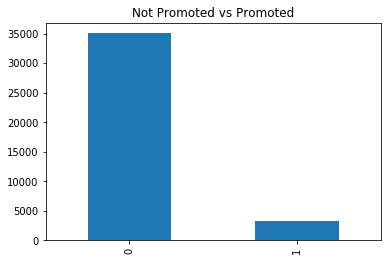

In [24]:
#Checking the dataset for any imbalance

print(train["Promoted_or_Not"].value_counts())

pro_count = train["Promoted_or_Not"].value_counts()
pro_count.plot(kind = "bar", title = "Not Promoted vs Promoted")

#train["Promoted_or_Not"].hist()

### USING SMOTE TO BALANCE TRAIN DATASET

In [ ]:
#!pip install -U imbalanced-learn

In [25]:
from imblearn.over_sampling import SMOTE

#lets see the initial Y_train
print(Y.value_counts())

#instantiate SMOTE
smote = SMOTE()

#apply SMOTE to previously defined X and Y
X_resampled, Y_resampled = smote.fit_resample(X, Y)

#view resampled data
print(pd.Series(Y_resampled).value_counts())

#visualize the new Y_resampled
#Y_resampled.plot(kind = "bar", title = "Not Promoted vs Promoted")

0    35071
1     3241
Name: Promoted_or_Not, dtype: int64
1    35071
0    35071
dtype: int64


### Normalizing the dataset

In [26]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X_resampled).transform(X_resampled)
X[0:5]

array([[-0.41743008,  1.09653864,  1.00816603, -0.29741941, -1.23604549,
         0.06165367,  0.53862795, -0.01948164, -0.22774934,  1.64240855,
        -0.54384978, -0.43205452, -0.3562349 , -0.20078045, -0.1329925 ,
        -0.13210179, -0.42836233, -1.48240389,  1.65466458, -0.19572749,
        -0.12639397,  1.61960165, -1.61960165, -1.18929664,  1.24707524,
        -0.17040695, -0.16402805, -0.1344891 , -0.14580169,  4.88972592,
        -0.12888682, -0.10098833, -0.13207031, -0.11912359, -0.12365349,
        -0.22632429, -0.09424541, -0.19365938, -0.12304628, -0.18036277,
        -0.2725594 , -0.09824444, -0.20990326, -0.0832084 , -0.2071009 ,
        -0.23134166, -0.13599304, -0.10916097, -0.12288712, -0.14615896,
        -0.48293053, -0.14010459, -0.15520987, -0.2628446 , -0.18655524,
        -0.17866134, -0.21964388, -0.1530469 , -0.26801812, -0.12856116,
        -0.1154783 , -0.08702719, -0.09261614,  3.65706594, -3.65706594,
         0.49522033, -0.1064834 , -0.47867325,  0.0

### DIVIDING MY TRAIN DATASET INTO TRAIN AND VALIDATION

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_resampled, Y_resampled, test_size = 0.2, random_state = 4)

In [28]:
print("Train set: ", X_train.shape, Y_train.shape)
print("Validation set:", X_val.shape, Y_val.shape)

Train set:  (56113, 79) (56113,)
Validation set: (14029, 79) (14029,)


### DEFINING EVALUATION METRICS

In [29]:
def evaluate(Y_train, Y_pred): #evaluating the models
    from sklearn.metrics import f1_score, classification_report, accuracy_score
    print("F1_SCORE: ", f1_score(Y_train, Y_pred))
    
    print("ACCURACY SCORE: ", accuracy_score(Y_train, Y_pred))
    
    print(classification_report(Y_val, Y_pred))
    
    ##checking unique values
    #print("\n Distinct counts in the train set: ")
    #print(Y_train.value_counts())
    #print("\n Distinct counts in the prediction: ")
    #predictions = pd.DataFrame(Y_pred)
    #print(predictions[0].value_counts())

### TRAINING MODELS

### MODEL 1: LOGISTIC REGRESSION


In [30]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C = 0.01, solver = "liblinear", class_weight = "balanced").fit(X_train, Y_train)
LR


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
Y_pred = LR.predict(X_val)

In [32]:
evaluate(Y_val, Y_pred)

F1_SCORE:  0.795036138006273
ACCURACY SCORE:  0.7857295601967353
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      6987
           1       0.76      0.83      0.80      7042

    accuracy                           0.79     14029
   macro avg       0.79      0.79      0.79     14029
weighted avg       0.79      0.79      0.79     14029



In [33]:
#To estimate the probability of all class

Y_pred_proba = LR.predict_proba(X_val)
Y_pred_proba

array([[0.35532141, 0.64467859],
       [0.68923505, 0.31076495],
       [0.08485536, 0.91514464],
       ...,
       [0.86309905, 0.13690095],
       [0.31951261, 0.68048739],
       [0.84344978, 0.15655022]])

### Defining Confusion Matrix

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(Y_val, Y_pred, labels=[1,0]))

[[5830 1212]
 [1794 5193]]


Confusion matrix, without normalization
[[5830 1212]
 [1794 5193]]


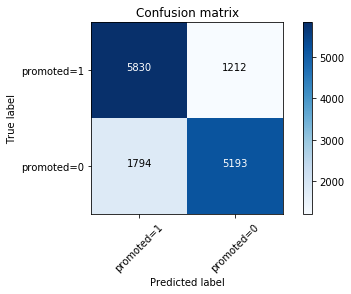

In [35]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### MODEL 2: NAIVE BAYES

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [37]:
Y_pred = classifier.predict(X_val)

In [38]:
evaluate(Y_val, Y_pred)

F1_SCORE:  0.6905341360317664
ACCURACY SCORE:  0.6555706037493763
              precision    recall  f1-score   support

           0       0.70      0.54      0.61      6987
           1       0.63      0.77      0.69      7042

    accuracy                           0.66     14029
   macro avg       0.66      0.66      0.65     14029
weighted avg       0.66      0.66      0.65     14029



Confusion matrix, without normalization
[[5391 1651]
 [3181 3806]]


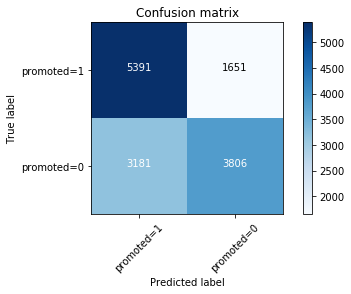

In [39]:
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### MODEL 3: SUPPORT VECTOR MACHINE (SVM)

In [40]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train) 

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [41]:
Y_pred = clf.predict(X_val)

In [42]:
evaluate(Y_val, Y_pred)

F1_SCORE:  0.8669818553539484
ACCURACY SCORE:  0.8515931285194953
              precision    recall  f1-score   support

           0       0.95      0.74      0.83      6987
           1       0.79      0.96      0.87      7042

    accuracy                           0.85     14029
   macro avg       0.87      0.85      0.85     14029
weighted avg       0.87      0.85      0.85     14029



Confusion matrix, without normalization
[[6785  257]
 [1825 5162]]


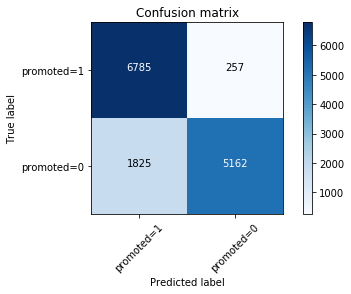

In [43]:
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### MODEL 4: RANDOM FOREST CLASSIFIER

In [44]:
from sklearn.ensemble import RandomForestClassifier

RFC =RandomForestClassifier(n_jobs = 2, random_state = 0)
RFC.fit(X_train, Y_train)

C:\Users\Dell\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
Y_pred = RFC.predict(X_val)
evaluate(Y_val, Y_pred)

F1_SCORE:  0.9593424335828563
ACCURACY SCORE:  0.9605103713735833
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      6987
           1       0.99      0.93      0.96      7042

    accuracy                           0.96     14029
   macro avg       0.96      0.96      0.96     14029
weighted avg       0.96      0.96      0.96     14029



Confusion matrix, without normalization
[[6536  506]
 [  48 6939]]


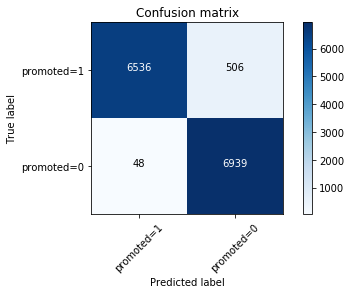

In [47]:
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### MODEL 5: XGBOOST

In [ ]:
#!pip install xgboost

In [48]:
import xgboost as xgb
from xgboost import XGBClassifier

xgboost = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb = xgboost.fit(X_train, Y_train)

Y_pred = xgb.predict(X_val)

In [49]:
evaluate(Y_val, Y_pred)

F1_SCORE:  0.9660300335325849
ACCURACY SCORE:  0.9667830921662272
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6987
           1       0.99      0.94      0.97      7042

    accuracy                           0.97     14029
   macro avg       0.97      0.97      0.97     14029
weighted avg       0.97      0.97      0.97     14029



Confusion matrix, without normalization
[[6626  416]
 [  50 6937]]


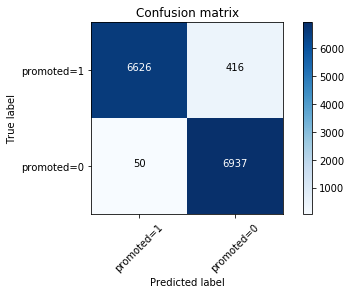

In [50]:
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### MODEL 6: CATBOOST

In [51]:
from catboost import Pool, CatBoostClassifier, cv

CBC = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)
CBC.fit(X_train,Y_train,eval_set=(X_val,Y_val))

Learning rate set to 0.119098
0:	learn: 0.8019888	test: 0.7997006	best: 0.7997006 (0)	total: 115ms	remaining: 1m 55s
1:	learn: 0.8237663	test: 0.8238649	best: 0.8238649 (1)	total: 152ms	remaining: 1m 15s
2:	learn: 0.8321423	test: 0.8278566	best: 0.8278566 (2)	total: 192ms	remaining: 1m 3s
3:	learn: 0.8451517	test: 0.8405446	best: 0.8405446 (3)	total: 235ms	remaining: 58.5s
4:	learn: 0.8669471	test: 0.8627130	best: 0.8627130 (4)	total: 276ms	remaining: 54.9s
5:	learn: 0.8893661	test: 0.8851664	best: 0.8851664 (5)	total: 315ms	remaining: 52.2s
6:	learn: 0.9167751	test: 0.9141778	best: 0.9141778 (6)	total: 350ms	remaining: 49.7s
7:	learn: 0.9304261	test: 0.9282201	best: 0.9282201 (7)	total: 390ms	remaining: 48.4s
8:	learn: 0.9313706	test: 0.9295032	best: 0.9295032 (8)	total: 433ms	remaining: 47.7s
9:	learn: 0.9340082	test: 0.9314278	best: 0.9314278 (9)	total: 477ms	remaining: 47.2s
10:	learn: 0.9378041	test: 0.9357759	best: 0.9357759 (10)	total: 528ms	remaining: 47.5s
11:	learn: 0.9386595

94:	learn: 0.9661398	test: 0.9644308	best: 0.9644308 (94)	total: 3.83s	remaining: 36.4s
95:	learn: 0.9661398	test: 0.9644308	best: 0.9644308 (94)	total: 3.86s	remaining: 36.4s
96:	learn: 0.9661576	test: 0.9644308	best: 0.9644308 (94)	total: 3.9s	remaining: 36.3s
97:	learn: 0.9662823	test: 0.9645021	best: 0.9645021 (97)	total: 3.94s	remaining: 36.2s
98:	learn: 0.9663001	test: 0.9645734	best: 0.9645734 (98)	total: 3.97s	remaining: 36.2s
99:	learn: 0.9663358	test: 0.9646447	best: 0.9646447 (99)	total: 4.01s	remaining: 36.1s
100:	learn: 0.9663358	test: 0.9646447	best: 0.9646447 (99)	total: 4.05s	remaining: 36.1s
101:	learn: 0.9663536	test: 0.9646447	best: 0.9646447 (99)	total: 4.09s	remaining: 36s
102:	learn: 0.9663001	test: 0.9646447	best: 0.9646447 (99)	total: 4.13s	remaining: 36s
103:	learn: 0.9664605	test: 0.9647159	best: 0.9647159 (103)	total: 4.17s	remaining: 35.9s
104:	learn: 0.9664962	test: 0.9647872	best: 0.9647872 (104)	total: 4.21s	remaining: 35.9s
105:	learn: 0.9666209	test: 0.

188:	learn: 0.9691872	test: 0.9674959	best: 0.9674959 (188)	total: 7.46s	remaining: 32s
189:	learn: 0.9691872	test: 0.9674246	best: 0.9674959 (188)	total: 7.5s	remaining: 32s
190:	learn: 0.9691872	test: 0.9674246	best: 0.9674959 (188)	total: 7.54s	remaining: 31.9s
191:	learn: 0.9692406	test: 0.9674246	best: 0.9674959 (188)	total: 7.58s	remaining: 31.9s
192:	learn: 0.9692585	test: 0.9674959	best: 0.9674959 (188)	total: 7.62s	remaining: 31.9s
193:	learn: 0.9692763	test: 0.9675672	best: 0.9675672 (193)	total: 7.65s	remaining: 31.8s
194:	learn: 0.9693476	test: 0.9676385	best: 0.9676385 (194)	total: 7.7s	remaining: 31.8s
195:	learn: 0.9693119	test: 0.9675672	best: 0.9676385 (194)	total: 7.74s	remaining: 31.7s
196:	learn: 0.9692941	test: 0.9675672	best: 0.9676385 (194)	total: 7.77s	remaining: 31.7s
197:	learn: 0.9692941	test: 0.9675672	best: 0.9676385 (194)	total: 7.81s	remaining: 31.6s
198:	learn: 0.9692941	test: 0.9674959	best: 0.9676385 (194)	total: 7.85s	remaining: 31.6s
199:	learn: 0.96

284:	learn: 0.9712366	test: 0.9675672	best: 0.9677810 (239)	total: 11.2s	remaining: 28.1s
285:	learn: 0.9712901	test: 0.9675672	best: 0.9677810 (239)	total: 11.2s	remaining: 28s
286:	learn: 0.9713435	test: 0.9675672	best: 0.9677810 (239)	total: 11.3s	remaining: 28s
287:	learn: 0.9713792	test: 0.9676385	best: 0.9677810 (239)	total: 11.3s	remaining: 27.9s
288:	learn: 0.9714326	test: 0.9675672	best: 0.9677810 (239)	total: 11.3s	remaining: 27.9s
289:	learn: 0.9714505	test: 0.9676385	best: 0.9677810 (239)	total: 11.4s	remaining: 27.8s
290:	learn: 0.9714505	test: 0.9676385	best: 0.9677810 (239)	total: 11.4s	remaining: 27.8s
291:	learn: 0.9714148	test: 0.9676385	best: 0.9677810 (239)	total: 11.5s	remaining: 27.8s
292:	learn: 0.9713970	test: 0.9677097	best: 0.9677810 (239)	total: 11.5s	remaining: 27.7s
293:	learn: 0.9713970	test: 0.9677097	best: 0.9677810 (239)	total: 11.5s	remaining: 27.7s
294:	learn: 0.9713792	test: 0.9677097	best: 0.9677810 (239)	total: 11.6s	remaining: 27.7s
295:	learn: 0.

380:	learn: 0.9724485	test: 0.9674246	best: 0.9677810 (239)	total: 14.9s	remaining: 24.2s
381:	learn: 0.9725019	test: 0.9674246	best: 0.9677810 (239)	total: 14.9s	remaining: 24.1s
382:	learn: 0.9725197	test: 0.9674246	best: 0.9677810 (239)	total: 15s	remaining: 24.1s
383:	learn: 0.9726445	test: 0.9674246	best: 0.9677810 (239)	total: 15s	remaining: 24s
384:	learn: 0.9726445	test: 0.9674246	best: 0.9677810 (239)	total: 15s	remaining: 24s
385:	learn: 0.9726445	test: 0.9674959	best: 0.9677810 (239)	total: 15.1s	remaining: 24s
386:	learn: 0.9726623	test: 0.9674246	best: 0.9677810 (239)	total: 15.1s	remaining: 23.9s
387:	learn: 0.9726801	test: 0.9674246	best: 0.9677810 (239)	total: 15.1s	remaining: 23.9s
388:	learn: 0.9727158	test: 0.9674246	best: 0.9677810 (239)	total: 15.2s	remaining: 23.8s
389:	learn: 0.9727158	test: 0.9674246	best: 0.9677810 (239)	total: 15.2s	remaining: 23.8s
390:	learn: 0.9727692	test: 0.9674246	best: 0.9677810 (239)	total: 15.3s	remaining: 23.8s
391:	learn: 0.9728227	

474:	learn: 0.9743019	test: 0.9672821	best: 0.9677810 (239)	total: 18.5s	remaining: 20.5s
475:	learn: 0.9743197	test: 0.9672821	best: 0.9677810 (239)	total: 18.6s	remaining: 20.5s
476:	learn: 0.9744088	test: 0.9672108	best: 0.9677810 (239)	total: 18.6s	remaining: 20.4s
477:	learn: 0.9743731	test: 0.9672821	best: 0.9677810 (239)	total: 18.7s	remaining: 20.4s
478:	learn: 0.9744266	test: 0.9673533	best: 0.9677810 (239)	total: 18.7s	remaining: 20.3s
479:	learn: 0.9744088	test: 0.9673533	best: 0.9677810 (239)	total: 18.7s	remaining: 20.3s
480:	learn: 0.9744444	test: 0.9673533	best: 0.9677810 (239)	total: 18.8s	remaining: 20.3s
481:	learn: 0.9744622	test: 0.9673533	best: 0.9677810 (239)	total: 18.8s	remaining: 20.2s
482:	learn: 0.9744444	test: 0.9673533	best: 0.9677810 (239)	total: 18.9s	remaining: 20.2s
483:	learn: 0.9744622	test: 0.9674246	best: 0.9677810 (239)	total: 18.9s	remaining: 20.2s
484:	learn: 0.9744979	test: 0.9674246	best: 0.9677810 (239)	total: 19s	remaining: 20.1s
485:	learn: 

568:	learn: 0.9757988	test: 0.9673533	best: 0.9677810 (239)	total: 22.2s	remaining: 16.8s
569:	learn: 0.9758523	test: 0.9674246	best: 0.9677810 (239)	total: 22.3s	remaining: 16.8s
570:	learn: 0.9758523	test: 0.9674246	best: 0.9677810 (239)	total: 22.3s	remaining: 16.8s
571:	learn: 0.9758701	test: 0.9674246	best: 0.9677810 (239)	total: 22.3s	remaining: 16.7s
572:	learn: 0.9758523	test: 0.9674246	best: 0.9677810 (239)	total: 22.4s	remaining: 16.7s
573:	learn: 0.9758167	test: 0.9673533	best: 0.9677810 (239)	total: 22.4s	remaining: 16.6s
574:	learn: 0.9758701	test: 0.9674246	best: 0.9677810 (239)	total: 22.5s	remaining: 16.6s
575:	learn: 0.9759058	test: 0.9674959	best: 0.9677810 (239)	total: 22.5s	remaining: 16.6s
576:	learn: 0.9759236	test: 0.9674959	best: 0.9677810 (239)	total: 22.6s	remaining: 16.5s
577:	learn: 0.9759414	test: 0.9675672	best: 0.9677810 (239)	total: 22.6s	remaining: 16.5s
578:	learn: 0.9759058	test: 0.9675672	best: 0.9677810 (239)	total: 22.7s	remaining: 16.5s
579:	learn

663:	learn: 0.9773849	test: 0.9673533	best: 0.9677810 (239)	total: 26.1s	remaining: 13.2s
664:	learn: 0.9773849	test: 0.9673533	best: 0.9677810 (239)	total: 26.2s	remaining: 13.2s
665:	learn: 0.9774740	test: 0.9673533	best: 0.9677810 (239)	total: 26.2s	remaining: 13.1s
666:	learn: 0.9775097	test: 0.9673533	best: 0.9677810 (239)	total: 26.2s	remaining: 13.1s
667:	learn: 0.9775097	test: 0.9673533	best: 0.9677810 (239)	total: 26.3s	remaining: 13.1s
668:	learn: 0.9775275	test: 0.9673533	best: 0.9677810 (239)	total: 26.3s	remaining: 13s
669:	learn: 0.9774918	test: 0.9673533	best: 0.9677810 (239)	total: 26.4s	remaining: 13s
670:	learn: 0.9775275	test: 0.9673533	best: 0.9677810 (239)	total: 26.4s	remaining: 12.9s
671:	learn: 0.9774918	test: 0.9673533	best: 0.9677810 (239)	total: 26.4s	remaining: 12.9s
672:	learn: 0.9774740	test: 0.9673533	best: 0.9677810 (239)	total: 26.5s	remaining: 12.9s
673:	learn: 0.9774918	test: 0.9673533	best: 0.9677810 (239)	total: 26.5s	remaining: 12.8s
674:	learn: 0.

759:	learn: 0.9790066	test: 0.9672108	best: 0.9677810 (239)	total: 29.9s	remaining: 9.44s
760:	learn: 0.9790245	test: 0.9672821	best: 0.9677810 (239)	total: 29.9s	remaining: 9.4s
761:	learn: 0.9790245	test: 0.9672821	best: 0.9677810 (239)	total: 30s	remaining: 9.36s
762:	learn: 0.9790423	test: 0.9672821	best: 0.9677810 (239)	total: 30s	remaining: 9.32s
763:	learn: 0.9790245	test: 0.9672108	best: 0.9677810 (239)	total: 30s	remaining: 9.28s
764:	learn: 0.9790245	test: 0.9671395	best: 0.9677810 (239)	total: 30.1s	remaining: 9.24s
765:	learn: 0.9790779	test: 0.9672108	best: 0.9677810 (239)	total: 30.1s	remaining: 9.2s
766:	learn: 0.9791314	test: 0.9672108	best: 0.9677810 (239)	total: 30.2s	remaining: 9.16s
767:	learn: 0.9791136	test: 0.9672821	best: 0.9677810 (239)	total: 30.2s	remaining: 9.12s
768:	learn: 0.9791136	test: 0.9673533	best: 0.9677810 (239)	total: 30.2s	remaining: 9.08s
769:	learn: 0.9791314	test: 0.9673533	best: 0.9677810 (239)	total: 30.3s	remaining: 9.04s
770:	learn: 0.9791

854:	learn: 0.9805393	test: 0.9667831	best: 0.9677810 (239)	total: 33.6s	remaining: 5.7s
855:	learn: 0.9805571	test: 0.9667831	best: 0.9677810 (239)	total: 33.6s	remaining: 5.66s
856:	learn: 0.9805571	test: 0.9667118	best: 0.9677810 (239)	total: 33.7s	remaining: 5.62s
857:	learn: 0.9806106	test: 0.9667118	best: 0.9677810 (239)	total: 33.7s	remaining: 5.58s
858:	learn: 0.9806462	test: 0.9667118	best: 0.9677810 (239)	total: 33.7s	remaining: 5.54s
859:	learn: 0.9806284	test: 0.9667118	best: 0.9677810 (239)	total: 33.8s	remaining: 5.5s
860:	learn: 0.9806284	test: 0.9667831	best: 0.9677810 (239)	total: 33.8s	remaining: 5.46s
861:	learn: 0.9806462	test: 0.9669257	best: 0.9677810 (239)	total: 33.9s	remaining: 5.42s
862:	learn: 0.9806640	test: 0.9668544	best: 0.9677810 (239)	total: 33.9s	remaining: 5.38s
863:	learn: 0.9806818	test: 0.9668544	best: 0.9677810 (239)	total: 33.9s	remaining: 5.34s
864:	learn: 0.9806997	test: 0.9668544	best: 0.9677810 (239)	total: 34s	remaining: 5.3s
865:	learn: 0.9

950:	learn: 0.9818759	test: 0.9668544	best: 0.9677810 (239)	total: 37.3s	remaining: 1.92s
951:	learn: 0.9818759	test: 0.9669257	best: 0.9677810 (239)	total: 37.4s	remaining: 1.88s
952:	learn: 0.9818580	test: 0.9669257	best: 0.9677810 (239)	total: 37.4s	remaining: 1.84s
953:	learn: 0.9818759	test: 0.9669257	best: 0.9677810 (239)	total: 37.5s	remaining: 1.8s
954:	learn: 0.9819293	test: 0.9668544	best: 0.9677810 (239)	total: 37.5s	remaining: 1.77s
955:	learn: 0.9819115	test: 0.9668544	best: 0.9677810 (239)	total: 37.5s	remaining: 1.73s
956:	learn: 0.9819293	test: 0.9668544	best: 0.9677810 (239)	total: 37.6s	remaining: 1.69s
957:	learn: 0.9819293	test: 0.9668544	best: 0.9677810 (239)	total: 37.6s	remaining: 1.65s
958:	learn: 0.9819471	test: 0.9668544	best: 0.9677810 (239)	total: 37.6s	remaining: 1.61s
959:	learn: 0.9819471	test: 0.9668544	best: 0.9677810 (239)	total: 37.7s	remaining: 1.57s
960:	learn: 0.9820719	test: 0.9669257	best: 0.9677810 (239)	total: 37.7s	remaining: 1.53s
961:	learn:

In [52]:
evaluate(Y_val, Y_pred)

F1_SCORE:  0.9660300335325849
ACCURACY SCORE:  0.9667830921662272
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      6987
           1       0.99      0.94      0.97      7042

    accuracy                           0.97     14029
   macro avg       0.97      0.97      0.97     14029
weighted avg       0.97      0.97      0.97     14029



Confusion matrix, without normalization
[[6626  416]
 [  50 6937]]


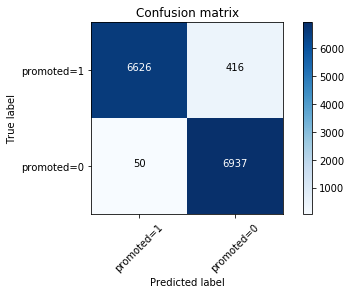

In [53]:
cnf_matrix = confusion_matrix(Y_val, Y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['promoted=1','promoted=0'],normalize= False,  title='Confusion matrix')

### CHECKING THE CORRELATION OF ALL THE PARAMETERS

In [54]:
corr = train.corr()
corr.style.background_gradient(cmap = "coolwarm").set_precision(2)

### IMPORTING TEST DATASET

In [55]:
dtest = pd.read_csv("test.csv")

In [56]:
dtest.head()

,EmployeeNo,Division,Qualification,Gender,Channel_of_Recruitment,Trainings_Attended,Year_of_birth,Last_performance_score,Year_of_recruitment,Targets_met,Previous_Award,Training_score_average,State_Of_Origin,Foreign_schooled,Marital_Status,Past_Disciplinary_Action,Previous_IntraDepartmental_Movement,No_of_previous_employers
0,YAK/S/00005,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1976,7.5,2017,0,0,65,FCT,Yes,Married,No,No,1
1,YAK/S/00011,Information Technology and Solution Support,NaN,Male,Direct Internal process,2,1991,0.0,2018,0,0,69,OGUN,Yes,Married,No,No,1
2,YAK/S/00015,Research and Innovation,"MSc, MBA and PhD",Male,Direct Internal process,2,1984,7.5,2012,0,0,76,KANO,Yes,Married,No,No,1
3,YAK/S/00016,Customer Support and Field Operations,First Degree or HND,Male,Agency and others,2,1984,2.5,2009,0,0,52,RIVERS,No,Single,No,No,1
4,YAK/S/00017,Information Technology and Solution Support,First Degree or HND,Male,Agency and others,2,1983,7.5,2014,1,0,69,FCT,Yes,Married,No,No,0


In [57]:
dtest.shape

(16496, 18)

### TEST DATA CLEANING AND PREPROCESSING

In [59]:
dtest.dtypes

EmployeeNo                              object
Division                                object
Qualification                           object
Gender                                  object
Channel_of_Recruitment                  object
Trainings_Attended                       int64
Year_of_birth                            int64
Last_performance_score                 float64
Year_of_recruitment                      int64
Targets_met                              int64
Previous_Award                           int64
Training_score_average                   int64
State_Of_Origin                         object
Foreign_schooled                        object
Marital_Status                          object
Past_Disciplinary_Action                object
Previous_IntraDepartmental_Movement     object
No_of_previous_employers                object
dtype: object

In [58]:
dtest.isnull().sum()

EmployeeNo                               0
Division                                 0
Qualification                          730
Gender                                   0
Channel_of_Recruitment                   0
Trainings_Attended                       0
Year_of_birth                            0
Last_performance_score                   0
Year_of_recruitment                      0
Targets_met                              0
Previous_Award                           0
Training_score_average                   0
State_Of_Origin                          0
Foreign_schooled                         0
Marital_Status                           0
Past_Disciplinary_Action                 0
Previous_IntraDepartmental_Movement      0
No_of_previous_employers                 0
dtype: int64

In [60]:
dtest.Qualification.value_counts()

First Degree or HND         11091
MSc, MBA and PhD             4456
Non-University Education      219
Name: Qualification, dtype: int64

In [61]:
dtest.Qualification.fillna("Maybe_Schooled_or_not", inplace = True)

In [62]:
dtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16496 entries, 0 to 16495
Data columns (total 18 columns):
EmployeeNo                             16496 non-null object
Division                               16496 non-null object
Qualification                          16496 non-null object
Gender                                 16496 non-null object
Channel_of_Recruitment                 16496 non-null object
Trainings_Attended                     16496 non-null int64
Year_of_birth                          16496 non-null int64
Last_performance_score                 16496 non-null float64
Year_of_recruitment                    16496 non-null int64
Targets_met                            16496 non-null int64
Previous_Award                         16496 non-null int64
Training_score_average                 16496 non-null int64
State_Of_Origin                        16496 non-null object
Foreign_schooled                       16496 non-null object
Marital_Status                         164

### TEST DATA ENGINEERING AND PREPROCESSING

In [63]:
dtest["Age"] = 2019 - dtest["Year_of_birth"]
dtest["Years_worked"] = 2019 - dtest["Year_of_recruitment"]
dtest["retire_or_not"] = [1 if Age>60 else 0 for Age in list(dtest["Age"].values)]

In [64]:
dtest.drop(["Year_of_birth", "Year_of_recruitment", "EmployeeNo"], axis = 1, inplace = True)

In [65]:
test_num = dtest.select_dtypes(include = numerics)

test_alph = dtest.select_dtypes(exclude = numerics)

In [66]:
test_alph_encode = test_alph.copy()
test_alph_encode = pd.get_dummies(test_alph_encode)

In [67]:
test = pd.concat([test_num, test_alph_encode], axis = 1)


In [68]:
test.shape

(16496, 79)

In [69]:
test.head()

,Trainings_Attended,Last_performance_score,Targets_met,Previous_Award,Training_score_average,Age,Years_worked,retire_or_not,Division_Business Finance Operations,Division_Commercial Sales and Marketing,...,Past_Disciplinary_Action_Yes,Previous_IntraDepartmental_Movement_No,Previous_IntraDepartmental_Movement_Yes,No_of_previous_employers_0,No_of_previous_employers_1,No_of_previous_employers_2,No_of_previous_employers_3,No_of_previous_employers_4,No_of_previous_employers_5,No_of_previous_employers_More than 5
0,2,7.5,0,0,65,43,2,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1,2,0.0,0,0,69,28,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
2,2,7.5,0,0,76,35,7,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,2,2.5,0,0,52,35,10,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,2,7.5,1,0,69,36,5,0,0,0,...,0,1,0,1,0,0,0,0,0,0


### DEFINING X_test

In [70]:
X_test = np.asarray(test)

### USING THE MODEL WITH THE BEST PERFOEMANCE ON THE TEST DATASET

In [71]:
Y_pred = CBC.predict(X_test)

In [72]:
test["Promoted_or_not"] = Y_pred

In [73]:
sample = pd.read_csv("sample_submission2.csv")


In [75]:
print(Y_pred.shape)
print(sample.shape)

(16496,)
(16496, 2)


In [76]:
sample["Promoted_or_Not"] = Y_pred
sample.to_csv("sample.csv", index = False)